Importing packages

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

Data Pre-processing

In [2]:
raw_csv_data = pd.read_csv("Index2020.csv") 
df_com=raw_csv_data.copy()
df_com.date = pd.to_datetime(df_com.date, dayfirst = True)
df_com.set_index("date", inplace=True)
df_com=df_com.asfreq('b')
df_com=df_com.fillna(method='ffill')

In [3]:
df_com['market_value']=df_com.spx

In [4]:
del df_com['dax']
size = int(len(df_com)*0.8)
df, df_test = df_com.iloc[:size], df_com.iloc[size:]

ACF

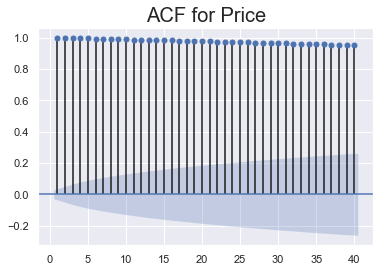

In [6]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Price", size = 20)
plt.show()
#similar to s&p500
#40 lagged coefficient are significant & declining
#all between 0.9 & 1.0;effects hardly deteriorate over time
#Both behave the same & past values affect present

PACF

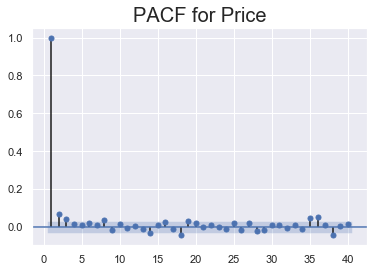

In [7]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Price", size =20)
plt.show()
#only include past lags which hv direct significant effect on present
#most of the coefficients from 25th lag onwards are not significant;Ignore?too close to 0;small model impact
#model < 25 lags
#values after 22nd lag are -ve;frequency is in business days ~~ 22days in month
#cyclical changes;values month ago affect today

AR Models

In [8]:
model_ar = ARMA(df.market_value, order = (1,0))
results_ar = model_ar.fit()
#1 is model no; no.of past values to incorporate
#0 is not taking any residual values
#simple autoregressive(AR) model
results_ar.summary()
#critical value for 95percent confidence internal is not zero;coefficients are significant
#phi=0.9991;near 1;as seen in ACF & PACF graph;
#p-value;If a value is significantly different from 0 it means based on the data,
#not enough evidence to confirm it isn't equal to 0
#Therefore,assume its coefficient is 0, so we don't use it to make estimates or forecasts

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(1, 0)   Log Likelihood              -17269.268
Method:                       css-mle   S.D. of innovations             14.878
Date:                Mon, 02 Mar 2020   AIC                          34544.536
Time:                        15:15:45   BIC                          34563.558
Sample:                    01-03-2000   HQIC                         34551.263
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1451.0813    202.733      7.158      0.000    1053.733    1848.430
ar.L1.market_value     0.9990      0.001   1611.500      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           +0.0000j            1.0010            0.0000
-----------------------------------------------------------------------------
"""

In [9]:
model_ar_2 = ARMA(df.market_value, order = (2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(2, 0)   Log Likelihood              -17260.153
Method:                       css-mle   S.D. of innovations             14.846
Date:                Mon, 02 Mar 2020   AIC                          34528.306
Time:                        15:15:46   BIC                          34553.669
Sample:                    01-03-2000   HQIC                         34537.275
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1440.3555    205.532      7.008      0.000    1037.520    1843.191
ar.L1.market_value     0.9331      0.015     60.767      0.000       0.903       0.963
ar.L2.market_value     0.0660      0.015      4.298      0.000       0.036       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2          -15.1365           +0.0000j           15.1365            0.5000
-----------------------------------------------------------------------------
"""

In [10]:
model_ar_3 = ARMA(df.market_value, order = (3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(3, 0)   Log Likelihood              -17256.907
Method:                       css-mle   S.D. of innovations             14.834
Date:                Mon, 02 Mar 2020   AIC                          34523.815
Time:                        15:15:47   BIC                          34555.519
Sample:                    01-03-2000   HQIC                         34535.026
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1465.9004    218.370      6.713      0.000    1037.903    1893.898
ar.L1.market_value     0.9305      0.015     60.600      0.000       0.900       0.961
ar.L2.market_value     0.0292      0.021      1.386      0.166      -0.012       0.071
ar.L3.market_value     0.0394      0.015      2.548      0.011       0.009       0.070
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2           -0.8710           -4.9595j            5.0354           -0.2777
AR.3           -0.8710           +4.9595j            5.0354            0.2777
-----------------------------------------------------------------------------
"""

In [11]:
model_ar_4 = ARMA(df.market_value, order = (4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(4, 0)   Log Likelihood              -17256.344
Method:                       css-mle   S.D. of innovations             14.832
Date:                Mon, 02 Mar 2020   AIC                          34524.687
Time:                        15:15:48   BIC                          34562.733
Sample:                    01-03-2000   HQIC                         34538.141
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1467.8624    220.516      6.656      0.000    1035.659    1900.066
ar.L1.market_value     0.9299      0.015     60.544      0.000       0.900       0.960
ar.L2.market_value     0.0288      0.021      1.366      0.172      -0.013       0.070
ar.L3.market_value     0.0241      0.021      1.137      0.256      -0.017       0.066
ar.L4.market_value     0.0165      0.015      1.062      0.288      -0.014       0.047
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           -0.0000j            1.0007           -0.0000
AR.2            1.0245           -3.5227j            3.6687           -0.2050
AR.3            1.0245           +3.5227j            3.6687            0.2050
AR.4           -4.5119           -0.0000j            4.5119           -0.5000
-----------------------------------------------------------------------------
"""

In [26]:
model_ar_5 = ARMA(df.market_value, order = (5,0))
results_ar_5 = model_ar_5.fit()
results_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(5, 0)   Log Likelihood              -17256.109
Method:                       css-mle   S.D. of innovations             14.832
Date:                Mon, 02 Mar 2020   AIC                          34526.217
Time:                        17:09:58   BIC                          34570.604
Sample:                    01-03-2000   HQIC                         34541.914
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1449.5257    212.246      6.829      0.000    1033.530    1865.521
ar.L1.market_value     0.9298      0.015     60.505      0.000       0.900       0.960
ar.L2.market_value     0.0286      0.021      1.355      0.175      -0.013       0.070
ar.L3.market_value     0.0233      0.021      1.102      0.270      -0.018       0.065
ar.L4.market_value     0.0067      0.021      0.317      0.751      -0.035       0.048
ar.L5.market_value     0.0107      0.016      0.692      0.489      -0.020       0.041
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2            1.6119           -2.4425j            2.9265           -0.1572
AR.3            1.6119           +2.4425j            2.9265            0.1572
AR.4           -2.4258           -2.2353j            3.2986           -0.3815
AR.5           -2.4258           +2.2353j            3.2986            0.3815
-----------------------------------------------------------------------------
"""

In [27]:
model_ar_6 = ARMA(df.market_value, order = (6,0))
results_ar_6 = model_ar_6.fit()
results_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(6, 0)   Log Likelihood              -17255.071
Method:                       css-mle   S.D. of innovations             14.828
Date:                Mon, 02 Mar 2020   AIC                          34526.142
Time:                        17:11:15   BIC                          34576.869
Sample:                    01-03-2000   HQIC                         34544.081
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1478.8926    228.083      6.484      0.000    1031.859    1925.926
ar.L1.market_value     0.9295      0.015     60.605      0.000       0.899       0.960
ar.L2.market_value     0.0283      0.021      1.346      0.178      -0.013       0.070
ar.L3.market_value     0.0232      0.021      1.097      0.272      -0.018       0.065
ar.L4.market_value     0.0058      0.021      0.276      0.782      -0.036       0.047
ar.L5.market_value    -0.0100      0.021     -0.474      0.636      -0.052       0.031
ar.L6.market_value     0.0223      0.016      1.439      0.150      -0.008       0.053
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           -0.0000j            1.0007           -0.0000
AR.2            1.5609           -1.4098j            2.1033           -0.1169
AR.3            1.5609           +1.4098j            2.1033            0.1169
AR.4           -2.1961           -0.0000j            2.1961           -0.5000
AR.5           -0.7382           -2.0167j            2.1476           -0.3058
AR.6           -0.7382           +2.0167j            2.1476            0.3058
-----------------------------------------------------------------------------
"""

In [28]:
model_ar_7 = ARMA(df.market_value, order = (7,0))
results_ar_7 = model_ar_7.fit()
results_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(7, 0)   Log Likelihood              -17254.786
Method:                       css-mle   S.D. of innovations             14.827
Date:                Mon, 02 Mar 2020   AIC                          34527.573
Time:                        17:11:56   BIC                          34584.641
Sample:                    01-03-2000   HQIC                         34547.754
                         - 01-26-2016                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1467.0842    223.615      6.561      0.000    1028.807    1905.362
ar.L1.market_value     0.9292      0.015     60.576      0.000       0.899       0.959
ar.L2.market_value     0.0285      0.021      1.353      0.176      -0.013       0.070
ar.L3.market_value     0.0232      0.021      1.094      0.274      -0.018       0.065
ar.L4.market_value     0.0056      0.021      0.263      0.793      -0.036       0.047
ar.L5.market_value    -0.0104      0.021     -0.489      0.625      -0.052       0.031
ar.L6.market_value     0.0114      0.021      0.539      0.590      -0.030       0.053
ar.L7.market_value     0.0117      0.016      0.754      0.451      -0.019       0.042
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           -0.0000j            1.0007           -0.0000
AR.2            1.5106           -1.1447j            1.8953           -0.1032
AR.3            1.5106           +1.1447j            1.8953            0.1032
AR.4           -0.3096           -2.0107j            2.0344           -0.2743
AR.5           -0.3096           +2.0107j            2.0344            0.2743
AR.6           -2.1894           -0.9780j            2.3979           -0.4331
AR.7           -2.1894           +0.9780j            2.3979            0.4331
-----------------------------------------------------------------------------
"""

LLR TEST

In [12]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [16]:
model_ar_8 = ARMA(df.market_value, order = (8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_7, results_ar_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(8, 0)   Log Likelihood              -17252.194
Method:                       css-mle   S.D. of innovations             14.818
Date:                Mon, 02 Mar 2020   AIC                          34524.387
Time:                        15:15:56   BIC                          34587.796
Sample:                    01-03-2000   HQIC                         34546.811
                         - 01-26-2016                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1487.4797    235.339      6.321      0.000    1026.224    1948.735
ar.L1.market_value     0.9288      0.015     60.692      0.000       0.899       0.959
ar.L2.market_value  

In [17]:
model_ar_9 = ARMA(df.market_value, order = (9,0))
results_ar_9 = model_ar_9.fit()
print(results_ar_9.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_8, results_ar_9)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 4192
Model:                     ARMA(9, 0)   Log Likelihood              -17251.599
Method:                       css-mle   S.D. of innovations             14.815
Date:                Mon, 02 Mar 2020   AIC                          34525.198
Time:                        15:16:02   BIC                          34594.948
Sample:                    01-03-2000   HQIC                         34549.863
                         - 01-26-2016                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1469.7738    227.731      6.454      0.000    1023.429    1916.119
ar.L1.market_value     0.9294      0.015     60.658      0.000       0.899       0.959
ar.L2.market_value  

In [18]:
print ("LLR test: " + str(LLR_test(results_ar, results_ar_8, DF =7)))

LLR test: 0.0


Analysing the Residuals

In [19]:
df['res_price'] = results_ar_8.resid

In [20]:
df.res_price.mean()

0.002934245998492769

In [21]:
df.res_price.var()

219.86795305028454

In [22]:
sts.adfuller(df.res_price)

(-64.54550864914931,
 0.0,
 0,
 4191,
 {'1%': -3.4319112764905055,
  '5%': -2.8622298860748465,
  '10%': -2.5671372322228025},
 34212.8699483783)

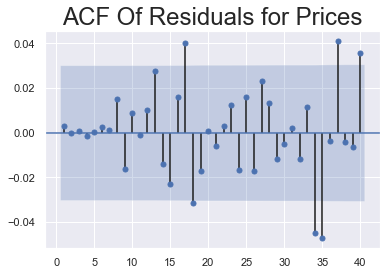

In [23]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

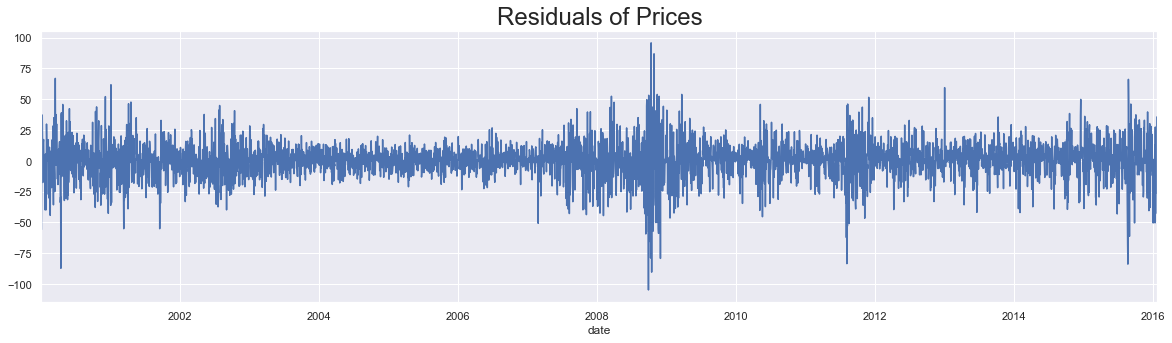

In [24]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()